### 为何选择Pytorch？

* PyTorch是一个建立在Torch库之上的Python包，旨在加速深度学习应用。它提供一种类似NumPy的抽象方法来表征张量（或多维数组），它可以利用GPU来加速训练。由于 PyTorch 采用了动态计算图（dynamic computational graph）结构，且基于tape的autograd 系统的深度神经网络。其它很多框架，比如 TensorFlow（TensorFlow2.0也加入了动态网络的支持）、Caffe、CNTK、Theano 等，采用静态计算图。 使用 PyTorch，通过一种我们称之为Reverse-mode auto-differentiation（反向模式自动微分）的技术，你可以零延迟或零成本地任意改变你的网络的行为。

PyTorch由4个主要包组成：
* torch：类似于Numpy的通用数组库，可将张量类型转换为torch.cuda.TensorFloat，并在GPU上进行计算。
* torch.autograd：用于构建计算图形并自动获取梯度的包。
* torch.nn：具有共享层和损失函数的神经网络库。
* torch.optim：具有通用优化算法（如SGD，Adam等）的优化包。

# 1: Installation 
### (1). Anaconda 
https://www.anaconda.com/products/individual#macos

https://mirrors.tuna.tsinghua.edu.cn/anaconda/archive/?C=M&O=A 

### (2). Define virtual environment：
conda create -n your_env_name python=3.8 numpy matplotlib pandas jupyter notebook

#### Enter and exit (MacOS)
conda activate your_env_name
conda deactivate
... 
conda list
conda remove -n your_env_name --all
conda create --name new_name --clone old_name
conda remove --name old_name --all # or its alias: `conda env remove --name old_name`


### (3). Install Pytorch and Tensorflow 
https://pytorch.org/get-started/locally/
conda install pytorch torchvision -c pytorch
pytorch --version

https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/
conda create -n tf tensorflow
or pip install tensorflow
tensorflow --version

### (4). jupyter notebook
conda install jupyter

### (5). Other IDEs: Pycharm, Spider ... 

### (6). Version control: Git 

In [2]:
import torch

In [3]:
print(torch.__version__)

1.8.1


# 2: Data manipulaiton 

Tensor VS. Numpy array: 
* tensor: a 𝑛-dimensional array
* GPU is well-supported to accelerate the computation whereas NumPy only supports CPU computation. 
* the tensor class supports automatic differentiation. 
These properties make the tensor class suitable for deep learning. 

### 2.1 生成tensor数据 

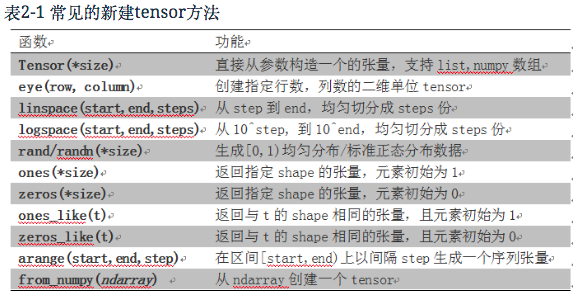

In [4]:
torch.Tensor([1,2,3,4,5,6])
torch.Tensor([[1,2,3],[4,5,6]])
#torch.Tensor(2,3)

t = torch.Tensor([[1,2,3],[4,5,6]])
torch.Tensor(t.shape), torch.Tensor(t.size())


(tensor([[1.0000, 2.0000, 3.0000],
         [4.0000, 5.0000, 6.0000]]),
 tensor([[7.5338e+28, 6.1687e+16, 2.5320e-12],
         [4.8516e+16, 2.5746e-12, 4.9153e-14]]))

torch.Size([2, 3])

In [5]:
x = torch.arange(12)
x, x.shape, x.numel(), x.reshape(3,4)

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 torch.Size([12]),
 12,
 tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]))

In [6]:
torch.zeros((2, 3, 4)), torch.zeros_like( torch.randn(2,3,4))

(tensor([[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
 
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]]),
 tensor([[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
 
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]]))

In [7]:
torch.eye(2,2), torch.linspace(1, 10, 4)

(tensor([[1., 0.],
         [0., 1.]]),
 tensor([ 1.,  4.,  7., 10.]))

In [8]:
torch.randn(3, 4)#, tf.random.normal(shape=[3, 4])

tensor([[-1.0690,  1.0979, -0.5558,  0.2874],
        [ 1.0042, -0.5978, -1.2535,  0.4044],
        [-0.1698,  1.2376, -0.0145, -0.0535]])

In [10]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [11]:
torch.Tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])  #torch.tensor 

# torch.Tensor is by default using dype FloatTensor, while torch.tensor infer dtype from data
# torch.tensor(1), torch.Tensor(1)

tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])

In [94]:
torch.tensor(1)

tensor(1)

In [96]:
torch.Tensor(1)

tensor([2.2030e-37])

## 2.2 Operations:
* torch.function, e.g. torch.sum, torch.add
* tensor.function, e.g. tensor.view, tensor.add(x, y) or x.add(y)

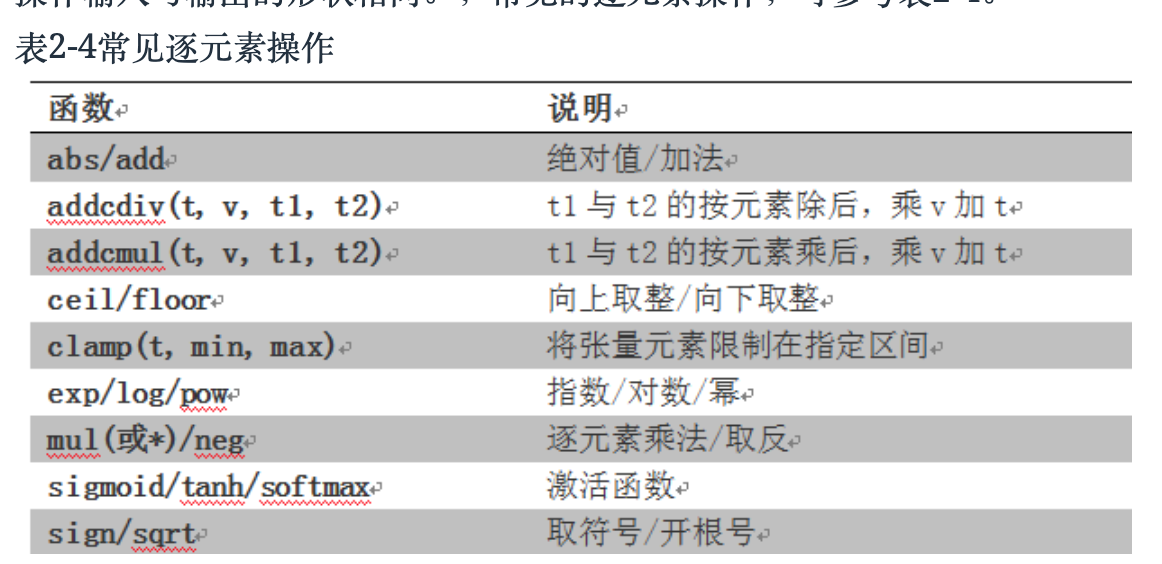


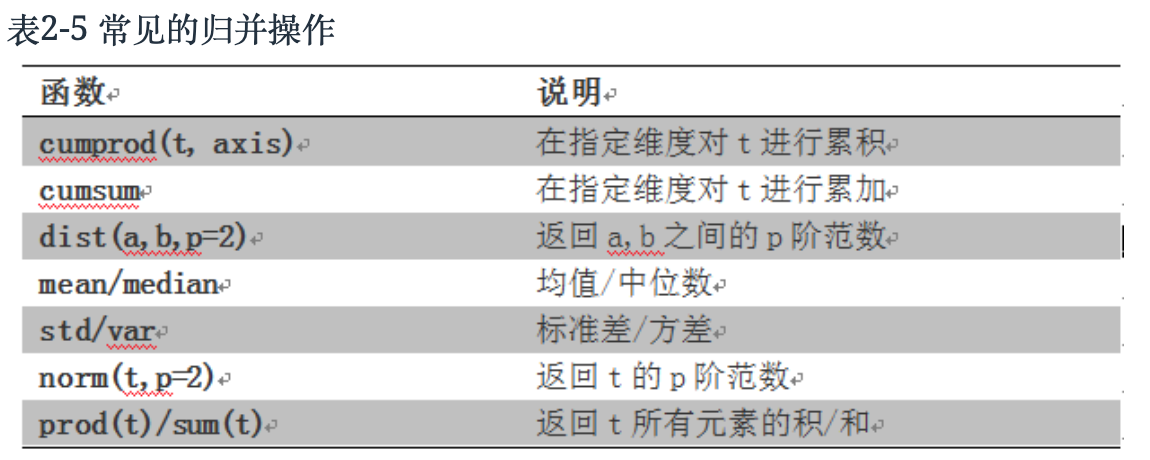

In [101]:
# torch.function 

x=torch.tensor([1,2])
y=torch.tensor([3,4])
z=x.add(y)
print(z)
print(x)
z = x.add_(y) #修改自身数据 
print(z)
print(x)

tensor([4, 6])
tensor([1, 2])
tensor([4, 6])
tensor([4, 6])


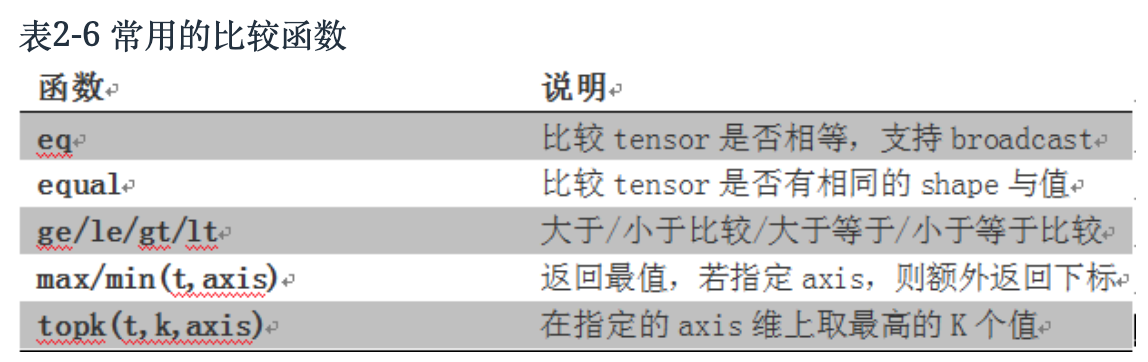

In [13]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x**y , torch.exp(x), x.sum()

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]),
 tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03]),
 tensor(15.))

In [14]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [15]:
# X = tf.reshape(tf.range(12, dtype=tf.float32), (3, 4))
# Y = tf.constant([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
# tf.concat([X, Y], axis=0), tf.concat([X, Y], axis=1)

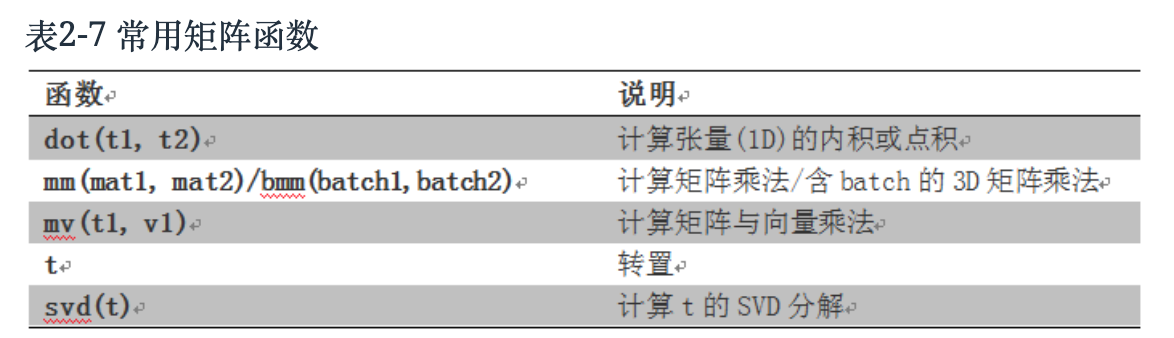

In [16]:
a = torch.tensor([2,3])
b = torch.tensor([3,4])

torch.dot(a,b)

tensor(18)

In [17]:
## note!! 
x = torch.randint(3, (2,2,3))
y = torch.randint(2, (2,3,4))
x, y, torch.bmm(x,y)

(tensor([[[0, 2, 1],
          [1, 2, 2]],
 
         [[1, 2, 0],
          [1, 1, 2]]]),
 tensor([[[0, 0, 0, 1],
          [1, 0, 1, 1],
          [1, 0, 0, 0]],
 
         [[0, 1, 1, 1],
          [0, 1, 0, 0],
          [0, 1, 0, 0]]]),
 tensor([[[3, 0, 2, 2],
          [4, 0, 2, 3]],
 
         [[0, 3, 1, 1],
          [0, 4, 1, 1]]]))

## 2.3 Broadcasting Mechanisms:

In [18]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b, a+b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

In [19]:
# a = tf.reshape(tf.range(3), (3, 1))
# b = tf.reshape(tf.range(2), (1, 2))
# a+b

## 2.4 index and slicing

In [20]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
X[2,2] = 100
X, X[-1], X[-1,:]

(tensor([[  0.,   1.,   2.,   3.],
         [  4.,   5.,   6.,   7.],
         [  8.,   9., 100.,  11.]]),
 tensor([  8.,   9., 100.,  11.]),
 tensor([  8.,   9., 100.,  11.]))

In [21]:
# X = tf.reshape(tf.range(12, dtype=tf.float32), (3, 4))
# X_var = tf.Variable(X)
# X_var[2,2].assign(100)
# X, X[-1], X[-1,:], X_var

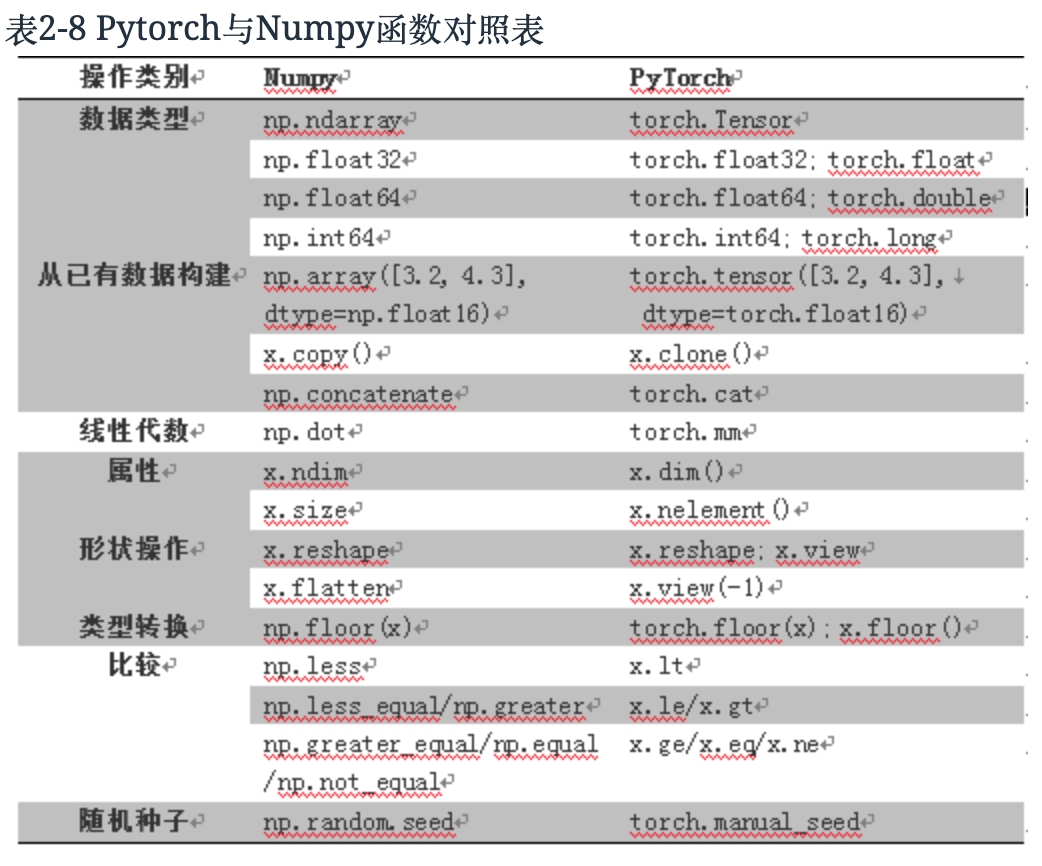

## 2.5 automatic differentiation

Before we even calculate the gradient of  𝑦  with respect to  𝐱 , we will need a place to store it. It is important that we do not allocate new memory every time we take a derivative with respect to a parameter because we will often update the same parameters thousands or millions of times and could quickly run out of memory. Note that a gradient of a scalar-valued function with respect to a vector  𝐱  is itself vector-valued and has the same shape as  𝐱 .

torch.Function and torch.Tensor are main two core classies of Autograd.


* 创建叶子节点(leaf node)的tensor，requires_grad参数缺省值为False，如果要对其求导需设置为True, 之后利用backward()方法进行梯度求解。

* 可利用requires_grad_()方法修改tensor的requires_grad属性。可以调用.detach()或with torch.no_grad():将不再计算张量的梯度，跟踪张量的历史记录。这点在评估模型、测试模型阶段常常使用。

* 通过运算创建的tensor（即非叶子节点），会自动被赋于grad_fn属性。该属性表示梯度函数。叶子节点的grad_fn为None。

* 最后得到的tensor执行backward()函数，此时自动计算各变在量的梯度，并将累加结果保存grad属性中。计算完成后，非叶子节点的梯度自动释放。

* backward()函数接受参数，该参数应和调用backward()函数的Tensor的维度相同，或者是可broadcast的维度。

* 反向传播的中间缓存会被清空，如果需要进行多次反向传播，需要指定backward中的参数retain_graph=True。多次反向传播时，梯度是累加的。

* 可以通过用torch.no_grad()包裹代码块来阻止autograd去跟踪那些标记为.requesgrad=True的张量的历史记录。这步在测试阶段经常使用。整个过程中，Pytorch采用计算图的形式进行组织，该计算图为动态图，它的计算图在每次前向传播时，将重新构建。其他深度学习架构，如TensorFlow、Keras一般为静态图。

In [106]:
## when y is scaler ! 

x=torch.Tensor([2])
w=torch.randn(1,requires_grad=True)
b=torch.randn(1,requires_grad=True)

y=torch.mul(w,x)  #等价于w*x
z=torch.add(y,b)  #等价于y+b

#查看x,w，b页子节点的requite_grad属性
print("x,w,b的require_grad属性分别为：{},{},{}".format(x.requires_grad,w.requires_grad,b.requires_grad))

x,w,b的require_grad属性分别为：False,True,True


In [23]:
#查看非叶子节点的requres_grad属性,
print("y，z的requires_grad属性分别为：{},{}".format(y.requires_grad,z.requires_grad))

#查看各节点是否为叶子节点
print("x，w，b，y，z的是否为叶子节点：{},{},{},{},{}".format(x.is_leaf,w.is_leaf,b.is_leaf,y.is_leaf,z.is_leaf))

#查看叶子节点的grad_fn属性
print("x，w，b的grad_fn属性：{},{},{}".format(x.grad_fn,w.grad_fn,b.grad_fn))

#查看非叶子节点的grad_fn属性
print("y，z的是否为叶子节点：{},{}".format(y.grad_fn,z.grad_fn))

y，z的requires_grad属性分别为：True,True
x，w，b，y，z的是否为叶子节点：True,True,True,False,False
x，w，b的grad_fn属性：None,None,None
y，z的是否为叶子节点：<MulBackward0 object at 0x109f01a90>,<AddBackward0 object at 0x109f01820>


In [110]:
#反向传播,执行backward之后计算图会自动清空，
# z.backward()
#如果需要多次使用backward，需要修改参数retain_graph为True，此时梯度是累加的
z.backward(retain_graph=True)
 
print("参数w,b的梯度分别为:{},{},{}".format(w.grad, b.grad, x.grad))
 
#非叶子节点的梯度，执行backward之后，会自动清空
print("非叶子节点y,z的梯度分别为:{},{}".format(y.grad, z.grad))


参数w,b的梯度分别为:tensor([6.]),tensor([3.]),tensor([ 0.,  4.,  8., 12.])
非叶子节点y,z的梯度分别为:None,None


<ipython-input-110-2db78d830502>:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print("非叶子节点y,z的梯度分别为:{},{}".format(y.grad, z.grad))


In [109]:
x = torch.arange(4.0, requires_grad=True)
x.grad  # The default value is None
y = 2 * torch.dot(x, x)
y.backward()

x.grad, x.grad == 4 * x

(tensor([ 0.,  4.,  8., 12.]), tensor([True, True, True, True]))

In [26]:
x= torch.tensor([[2, 3]], dtype=torch.float, requires_grad=True)
y = torch.zeros(1, 2)

J= torch.zeros(2 ,2)

#定义y与x之间的映射关系：
# y1=x1**2+3*x2，y2=x2**2+2*x1
y[0, 0] = x[0, 0] ** 2 + 3 * x[0 ,1]
y[0, 1] = x[0, 1] ** 2 + 2 * x[0, 0]


In [27]:
#y1对x的梯度
y.backward(torch.Tensor([[1, 0]]), retain_graph=True)
J[0]=x.grad
#梯度是累加的，故需要对x的梯度清零
x.grad = torch.zeros_like(x.grad)

#y2对x的梯度
y.backward(torch.Tensor([[0, 1]]))  # Note: no retain_graph = True! 
J[1]=x.grad
#显示jacobian矩阵的值
print(J)

tensor([[4., 3.],
        [2., 6.]])


In [28]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
x, y, u, z

(tensor([[2., 3.]], requires_grad=True),
 tensor([[4., 9.]], grad_fn=<MulBackward0>),
 tensor([[4., 9.]]),
 tensor([[ 8., 27.]], grad_fn=<MulBackward0>))

In [29]:
z.sum().backward()
x.grad == u, x.grad

(tensor([[True, True]]), tensor([[4., 9.]]))

Since the computation of y was recorded, we can subsequently invoke backpropagation on y to get the derivative of y = x * x with respect to x, which is 2 * x.

### Summary
Deep learning frameworks can automate the calculation of derivatives. To use it, we first attach gradients to those variables with respect to which we desire partial derivatives. We then record the computation of our target value, execute its function for backpropagation, and access the resulting gradient.

## 2.6 probability 

In [30]:
from torch.distributions import multinomial


In [31]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(2, fair_probs).sample()

tensor([0., 0., 0., 2., 0., 0.])

In [32]:
# It would be unbearably slow to do this with a Python for loop, so the function we are using supports drawing multiple samples at once, returning an array of independent samples in any shape we might desire.
multinomial.Multinomial(10, fair_probs).sample()

tensor([0., 2., 0., 1., 2., 5.])

In [33]:
# Store the results as 32-bit floats for division
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # Relative frequency as the estimate

tensor([0.1650, 0.1500, 0.1850, 0.1680, 0.1740, 0.1580])

## 2.7 Finding all the functions and classes in a module

In [34]:
print(dir(torch.distributions))
# print(dir(tf.random))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weibull', '__all__', '__builtins__', '__cached__', '__doc__'

In [35]:
help(torch.ones)

Help on built-in function ones:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the cur

### 机器学习的一般步骤：
* 导入需要的库
* 导入训练数据，可视化数据分布等情况
* 初始化权重参数
* 训练模型：向前传播，并计算损失函数； 向后传播，自动计算梯度，并存放在grad属性中；更新参数；梯度清零
* 可视化训练结果

# 3. Linear regression

In [111]:
%matplotlib inline
import random
import torch

In [113]:
# generate dataset 
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-1.3344, -0.0405]) 
label: tensor([1.6565])


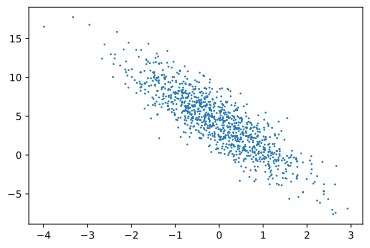

In [114]:
import matplotlib.pyplot as plt
plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1)

To train the image classifier with PyTorch, you need to complete the following steps:
Load the data. If you've done the previous step of this tutorial, you've handled this already.
Define a Convolution Neural Network.
Define a loss function.
Train the model on the training data.
Test the network on the test data.


In [115]:
# get shuffled batch data 
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i +
                                                   batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

# Initialization 
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# define model 
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

# define loss function 
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

# optimizer 
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            # Because our loss is calculated as a sum over the minibatch of examples, we normalize our step size by the batch size (batch_size), so that the magnitude of a typical step size does not depend heavily on our choice of the batch size.
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            
            
            

In [116]:
# training 
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss
batch_size = 32

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():   # not tracking backward grad value of the following operations; 上下文管理器，被该语句 wrap 起来的部分将不会track 梯度。
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 2.437442
epoch 2, loss 0.351754
epoch 3, loss 0.050766
epoch 4, loss 0.007363
epoch 5, loss 0.001099
epoch 6, loss 0.000199
epoch 7, loss 0.000069
epoch 8, loss 0.000051
epoch 9, loss 0.000048
epoch 10, loss 0.000048


In [41]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 8.7619e-05, -1.6618e-04], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0004], grad_fn=<RsubBackward1>)


In [42]:
true_w, w

(tensor([ 2.0000, -3.4000]),
 tensor([[ 1.9999],
         [-3.3998]], requires_grad=True))

In [43]:
true_w.shape, w.shape

(torch.Size([2]), torch.Size([2, 1]))

Summary: When we implemented linear regression from scratch, we defined our model parameters explicitly and coded up the calculations to produce output using basic linear algebra operations. You should know how to do this. But once your models get more complex, and once you have to do this nearly every day, you will be glad for the assistance. 
For standard operations, we can use a framework’s predefined layers,The Sequential class defines a container for several layers that will be chained together. 

NEW: torch.no_grad，
tf.GradientTape() 
https://www.tensorflow.org/guide/autodiff?hl=zh-cn

We relied only on (i) tensors for data storage and linear algebra; and (ii) auto differentiation for calculating gradients. In practice, because data iterators, loss functions, optimizers, and neural network layers are so common, modern libraries implement these components for us as well.In this section, we will show you how to implement the linear regression model concisely by using high-level APIs of deep learning frameworks.

In [117]:
from torch.utils import data 

dataset = data.TensorDataset(*(features, labels))
#dataset[:]

data_iter = data.DataLoader(dataset, 32, shuffle=True)
data_iter, len(data_iter)

(<torch.utils.data.dataloader.DataLoader at 0x13228b670>, 32)

In [120]:
next(iter(data_iter))

# for x,y in data_iter:
#     print(x)
#     print(y)

[tensor([[ 0.0163, -0.0832],
         [-0.1095, -0.8364],
         [ 0.2897,  0.5276],
         [ 0.1105, -0.5815],
         [ 0.7549, -0.3238],
         [-0.3763,  0.0549],
         [ 1.4565, -1.3688],
         [-0.5748,  0.2453],
         [-0.3272, -0.5512],
         [ 0.3826, -1.2316],
         [-1.0200,  1.5333],
         [-1.0765, -1.4251],
         [-1.1128, -0.1030],
         [-0.4938,  0.8869],
         [-0.0378,  0.6497],
         [-0.6913,  0.1362],
         [-1.0763,  0.6334],
         [ 1.7916, -0.8914],
         [ 0.2032,  0.1033],
         [ 0.3693, -0.5227],
         [ 0.3097,  0.7647],
         [ 0.7439, -0.6744],
         [-1.0333,  0.2243],
         [ 0.6276, -0.2796],
         [ 0.3713, -0.7299],
         [-0.2778,  0.7706],
         [-0.5518, -1.7594],
         [ 0.9266, -1.2539],
         [ 0.7620,  0.4469],
         [ 0.6498, -1.5088],
         [-0.2602,  0.8094],
         [ 0.4675, -0.1922]]),
 tensor([[ 4.5135],
         [ 6.8313],
         [ 2.9757],
         [

In [121]:
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))
net, net[0].weight, net[0].bias, net[0].weight.data, net[0].bias.data
# net[0].weight.data.normal_(0, 0.01), net[0].bias.data.fill_(0)

(Sequential(
   (0): Linear(in_features=2, out_features=1, bias=True)
 ),
 Parameter containing:
 tensor([[-0.6819,  0.4961]], requires_grad=True),
 Parameter containing:
 tensor([0.3250], requires_grad=True),
 tensor([[-0.6819,  0.4961]]),
 tensor([0.3250]))

In [122]:
import numpy as np
import torch
from torch.utils import data
from torch import nn

# generate data
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

#read dataset and get batched data iterator 
is_train = True
batch_size = 10
dataset = data.TensorDataset(*(features, labels))
data_iter = data.DataLoader(dataset, batch_size, shuffle=is_train)

#build model 
net = nn.Sequential(nn.Linear(2, 1))

#initialize parameters 
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

# Loss function 
loss = nn.MSELoss()
 
# Define optimizer 
trainer = torch.optim.SGD(net.parameters(), lr=0.03)
    
num_epochs = 10
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')
    
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)
## ! note accuracy difference: because here sampling with replacement and may not loop through all the data 

epoch 1, loss 0.000239
epoch 2, loss 0.000098
epoch 3, loss 0.000097
epoch 4, loss 0.000098
epoch 5, loss 0.000097
epoch 6, loss 0.000098
epoch 7, loss 0.000098
epoch 8, loss 0.000101
epoch 9, loss 0.000099
epoch 10, loss 0.000097
error in estimating w: tensor([0.0009, 0.0004])
error in estimating b: tensor([0.0006])


# 4. Logistic regression

In [48]:
from IPython import display
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
import sys, os
sys.path.append(os.path.realpath("/Users/tinggao/opt/anaconda3/envs/tf/lib/python3.7/site-packages/torchvision/datasets/data")) 

In [126]:
#!sudo pip install torchvision

### * Data Investigation

In [49]:
#note: change path because of specific environment 
mypath = "/Users/tinggao/opt/anaconda3/envs/tf/lib/python3.7/site-packages/torchvision/datasets/data"
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root=mypath, train=True,
transform=trans,
download=True)
mnist_test = torchvision.datasets.FashionMNIST(root=mypath, train=False,
transform=trans, download=True)

In [50]:
len(mnist_train), len(mnist_test), type(mnist_train), type(mnist_train[0]), len(mnist_train[0])

(60000, 10000, torchvision.datasets.mnist.FashionMNIST, tuple, 2)

In [51]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [52]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))

In [53]:
X.shape, X.dtype, y.shape, y.dtype

(torch.Size([18, 1, 28, 28]), torch.float32, torch.Size([18]), torch.int64)

(<matplotlib.image.AxesImage at 0x12ddc3520>, tensor(9))

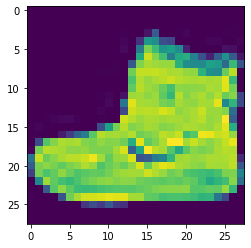

In [54]:
plt.imshow(X[0][0]), y[0]

In [55]:
#y[0].numpy(), y[0].item()

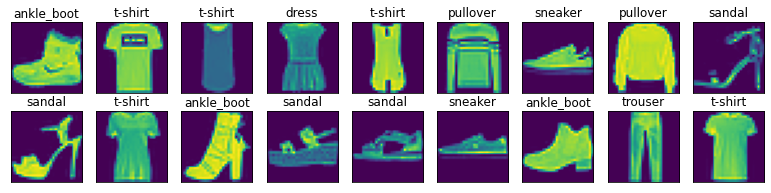

In [56]:
#visualization 
num_cols = 9
num_rows = 2
scale = 1.5
imgs = X.reshape(18, 28, 28) #note: check the shape of X 
titles = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
'sneaker', 'bag', 'ankle_boot']

figsize = (num_cols * scale, num_rows * scale)
_, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
axes = axes.flatten()

for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):
    # Tensor Image
        ax.imshow(img.numpy())
    else:
        # PIL Image
        ax.imshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
        ax.set_title(titles[y[i].item()])